Import Libraries

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

### Attributes <br>
1. age: Age of the patient (in years) - Domain [29, 77],
2. sex: Sex of the patient (1 = male, 0 = female),
3. trestbps: Resting blood pressure (in mm Hg on admission to the hospital) – Domain [94, 200],
4. chol: Serum cholesterol in mg/dl – Domain [126, 564],
5. fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false),
6. thalach: Maximum heart rate achieved – Domain [71, 202],
7. exang: Exercise-induced angina (1 = yes; 0 = no),
8. oldpeak: ST depression induced by exercise relative to rest – Domain [0, 6.2],
9. slope: Domain [0, 2],
10. ca: Domain [0, 4],
11. thal: Domain [0, 3],
12. cp: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 =
asymptomatic),
13. restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 =
showing probable or definite left ventricular hypertrophy) and
14. target: (Heart Disease Status: 1 = presence of heart disease, 0 = absence of heart disease; class
attribute that needs to be predicted using SVM and Decision Trees). 


##### Load Dataset

In [3]:
heart_disease_data = pd.read_csv("heart_disease_data.csv")

#### Using all attributes, build a Decision Tree model to predict whether a patient has a heart disease or not: Train the Decision Tree model using the given maximum depths: 3, 7, 11, 15.

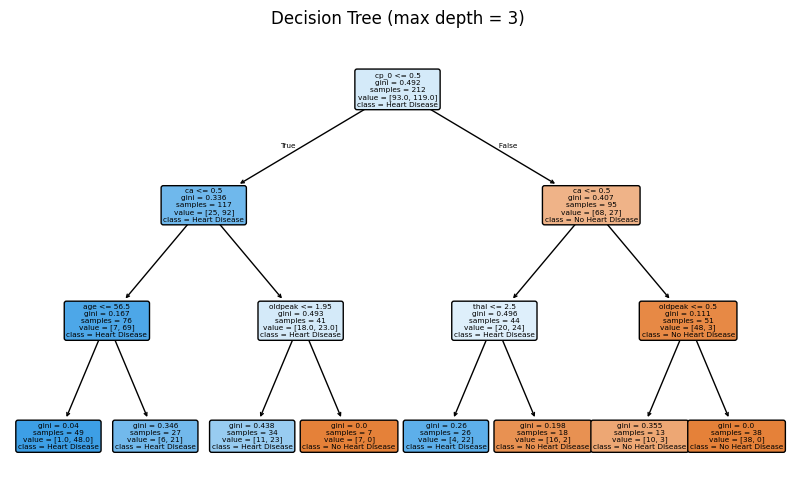

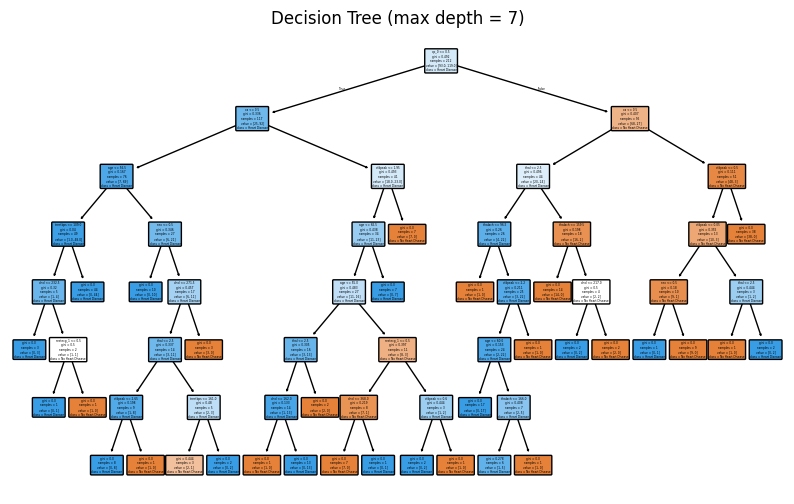

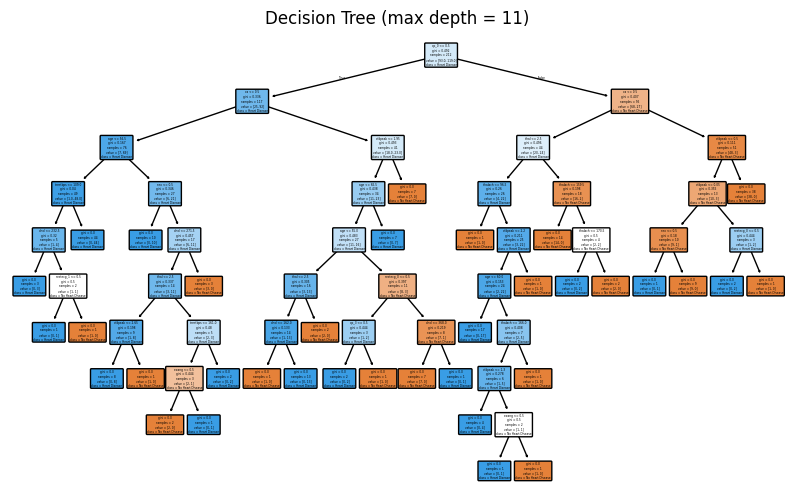

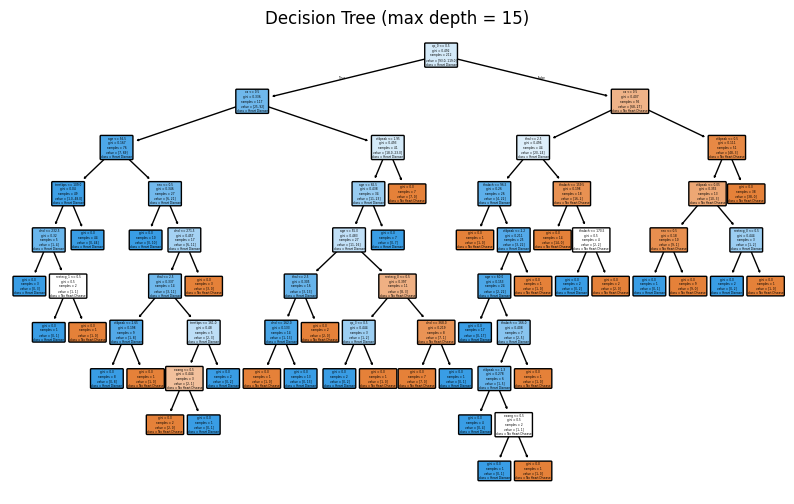

In [5]:
# Separate features and target
X = heart_disease_data.drop(columns='target')
y = heart_disease_data['target']

# Split the dataset into training and testing. 30 percent in testing, 70 in training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#All max dpeths
max_depths = [3,7,11,15] 

for max_depth in max_depths: #Loop through all depths
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=123) #initialize and train
    model.fit(X_train, y_train)
    
    #visual for trees
    plt.figure(figsize=(10, 6))
    plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], rounded=True)
    plt.title(f'Decision Tree (max depth = {max_depth})')
    plt.show()
    plt.close()


results = {
    'Max Depth': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

#### Perform 5-fold cross-validation for each of the 4 max depths and compute accuracy (mean of validation scores), precision and recall. Generate a table, as given below, for the obtained results.

In [6]:
for max_depth in max_depths:
    # Initialize the Decision Tree model
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=123)

    #5-fold cross-validation for accuracy
    accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(accuracy_scores)

    #Cross validation for precision
    precision_scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(precision_score))
    mean_precision = np.mean(precision_scores)

    #Cross validation for recall
    recall_scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(recall_score))
    mean_recall = np.mean(recall_scores)

    # Store the results
    results['Max Depth'].append(max_depth)
    results['Accuracy'].append(mean_accuracy)
    results['Precision'].append(mean_precision)
    results['Recall'].append(mean_recall)
#Table
results_df = pd.DataFrame(results)
#Print table
print(results_df)  

   Max Depth  Accuracy  Precision    Recall
0          3  0.798470   0.813298  0.836364
1          7  0.755574   0.778641  0.787879
2         11  0.745464   0.773376  0.769697
3         15  0.745464   0.773376  0.769697


#### How does the tree size/depth affect model performance in the context of overfitting/underfitting?

In the context of underfitting, trees that are too small/deep may not capture enough information about the data. This happens when a model that is made is too simplistic which cannot model the complexity of certain relationships properly. It could lead to important patterns in the data to be missed. In the context of overfitting, trees that are too large/deep means that a model is too complex. This can lead to models doing a good job recalling from the training set but perform poorly on a test set. A model that is overfitted will also capture insignificant details which can make it harder to generalize new data.

#### What is the meaning of the difference in accuracy, precision, and recall scores?

Accuracy measures the proportion of correct predictions, either true positives or true negatives, a model make. In this context, it is the proportion that the model correctly predicts if a patient has a heart disease or not. Precision is the measurement of the accuracy of positive predictions. In the context of this dataset, it is the measurement of how many patients that are predicted to have a heart disease to actually have it. Recall is the measure of a model’s ability to detect positives. In the context of this dataset, it is the measure of how many true cases of heart disease are detected. In the context of the model made previously, a tree with the max depth of 3 performed the best which means that max depths of 7,11, and 15 performance suffered from overfitting.

### Using all attributes, build an SVM Model to predict whether a patient has a heart disease or not: Train the SVM model using the given 4 kernel functions: linear, polynomial, sigmoid, sigmoid with different $\sigma$ value

In [7]:
#Split training and testing set. 80 percent training, 20 percent testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store model performances
performance_results = []

# Function to evaluate a model
def evaluate_model(kernel_name, model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Append results to performance_results list
    performance_results.append({
        'Kernel': kernel_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    })

#Linear kernel SVM
linear_svm = SVC(kernel='linear')
evaluate_model('Linear', linear_svm)

#Polynomial kernel SVM with degree 3
poly_svm = SVC(kernel='poly', degree=3)
evaluate_model('Polynomial', poly_svm)

#Sigmoid kernel SVM default coef0
sigmoid_svm = SVC(kernel='sigmoid', coef0=0.0)
evaluate_model('Sigmoid (default coef0)', sigmoid_svm)

#Sigmoid kernel SVM with different sigma coef0 adjusted =2
sigmoid_svm_tuned = SVC(kernel='sigmoid', coef0=2)  # coef = 2
evaluate_model('Sigmoid (coef0=2)', sigmoid_svm_tuned)

# Print performance results
results_df = pd.DataFrame(performance_results)
print(results_df)

                    Kernel  Accuracy  Precision   Recall
0                   Linear  0.885246   0.878788  0.90625
1               Polynomial  0.885246   0.903226  0.87500
2  Sigmoid (default coef0)  0.852459   0.870968  0.84375
3        Sigmoid (coef0=2)  0.868852   0.875000  0.87500


### Impact of different kernels on model performance?

A linear kernel is the simplest and assumes that the data is linearly separable. It works well when there are clear relationships between attributes but it can lead to underfitting if the attributes are relationships are more complex. A polynomial can fit curved decision boundaries that can separate more complex datasets but can risk overfitting if the degree is set too high. The sigmoid kernel can model more complex and non-linearly separable data like neural networks. It is sensitive to the coef and can risk overfitting if the parameters are not well tuned.

### Meaning of the difference in accuracy, precision, and recall scores?

All of the accuracies of the kernels were relatively the same with Linear and Polynomial being the most accurate. This means that the Linear and Polynomial kernels made the most correct predictions of whether or not a patient had a heart disease or not. The precision on the Polynomial kernel was the best but the Linear Kernel had the best recall measurement. This means that the polynomial kernel had fewer false positive prediction but the Linear kernel was better and identifying true heart disease cases

### Comparison between performance of Decision Tree and SVM models

When comparing the SVM experiments vs the Decision tree depth experiments, it is clear that the SVM models were more reliable. Even the worst performing SVM model, Sigmoid (default coef) performs better than decision tree max depth 3 which was the bet performing decision tree. This suggests that SVM’s are better at finding the decision boundary between patients with and without heart disease. This is likely due SVMs being able to handle non-linear relationships more effectively than the decision tree models. SVM can leverage different kernel functions which make it more flexible and SVM also include regularization to prevent overfitting. For improvement, the decision trees could implement pruning techniques to reduce overfitting by simplifying the tree after it has been fully built. For the SVM, you can tune the hyperparameters such as the degree for polynomial kernels or even the regularization parameter that is set a 1.0 by default.